In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataset_redwine=pd.read_csv('C:\\Users\\ruchi\\OneDrive\\Desktop\\projects\\Wine quality analysis\\winequality-red.csv')
dataset_redwine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
xred=dataset_redwine.iloc[:,:-1].values #Independent variables for red wine - 'data quality'  X--> Independent
xred

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [6]:
yred=dataset_redwine.iloc[:,-1:].values #Dependent variable for red wine Y--> Depedent
yred

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [7]:
dataset_whitewine=pd.read_csv('C:\\Users\\ruchi\\OneDrive\\Desktop\\projects\\Wine quality analysis\\winequality-white.csv')
dataset_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
xwhite=dataset_whitewine.iloc[:,:-1].values #Independent variables for white wine - 'data quality'
xwhite

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [10]:
ywhite=dataset_whitewine.iloc[:,-1:].values #Dependent variable for white wine
ywhite

array([[6],
       [6],
       [6],
       ...,
       [6],
       [7],
       [6]], dtype=int64)

In [11]:
#To check if there are any missing values in my data
dataset_redwine.isnull().values.any()

False

In [12]:
dataset_whitewine.isnull().values.any()

False

In [16]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split

In [17]:
xred_train,xred_test,yred_train,yred_test=train_test_split(xred,yred,test_size=0.2) #20% test data
xwhite_train,xwhite_test,ywhite_train,ywhite_test=train_test_split(xwhite,ywhite,test_size=0.2)

#xred_train= Independent variables in the training data --> Red Wine
#xred_test= Independent variables in the test data --> Red Wine
#yred_train= Dependent variable in the training data --> Red Wine
#yred_test= Dependent variable in the test data (to be compared with the predicted values after the model is designed) --> Red Wine

#Similar for White wine

In [18]:
#Normalizing the values - Feature Scaling
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()

In [21]:
xred_train=sc.fit_transform(xred_train)
xred_test=sc.fit_transform(xred_test)

In [22]:
xwhite_train=sc.fit_transform(xwhite_train)
xwhite_test=sc.fit_transform(xwhite_test)

([array([  0., 244., 755., 231.,  42.,   7.,   0.,   0.,   0.,   0.]),
  array([  2., 291., 695., 255.,  31.,   4.,   1.,   0.,   0.,   0.]),
  array([  0., 372., 541., 347.,  18.,   1.,   0.,   0.,   0.,   0.]),
  array([0.000e+00, 3.900e+01, 1.104e+03, 7.800e+01, 4.100e+01, 1.000e+01,
         1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00]),
  array([   0.,   37., 1165.,   42.,   13.,    3.,    8.,    9.,    0.,
            2.]),
  array([  0., 305., 675., 250.,  44.,   2.,   3.,   0.,   0.,   0.]),
  array([  0., 293., 718., 210.,  56.,   1.,   0.,   1.,   0.,   0.]),
  array([ 22., 222., 753., 257.,  25.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19., 254., 723., 260.,  21.,   2.,   0.,   0.,   0.,   0.]),
  array([  0., 200., 842., 191.,  32.,   9.,   2.,   2.,   1.,   0.]),
  array([  0., 340., 641., 249.,  48.,   1.,   0.,   0.,   0.,   0.])],
 array([-3.6859691 , -2.23584815, -0.78572721,  0.66439373,  2.11451467,
         3.56463562,  5.01475656,  6.4648775 ,  7.91499844,  9.3651

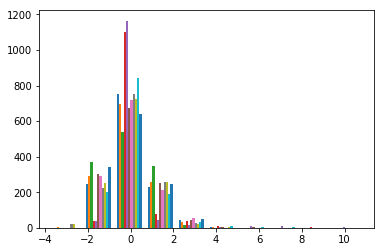

In [65]:
plt.hist(xred_train)

([array([1.020e+02, 2.216e+03, 1.449e+03, 1.450e+02, 4.000e+00, 1.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
  array([1.000e+01, 2.376e+03, 1.371e+03, 1.350e+02, 2.100e+01, 4.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
  array([9.400e+01, 2.389e+03, 1.275e+03, 1.450e+02, 1.400e+01, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
  array([0.000e+00, 2.307e+03, 1.451e+03, 1.560e+02, 3.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]),
  array([0.000e+00, 2.589e+03, 1.220e+03, 4.600e+01, 3.200e+01, 2.300e+01,
         3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
  array([4.200e+01, 2.212e+03, 1.553e+03, 9.800e+01, 1.000e+01, 2.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
  array([9.100e+01, 2.125e+03, 1.580e+03, 1.170e+02, 4.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
  array([3.600e+01, 2.159e+03, 1.653e+03, 6.700e+01, 2.000e+00, 0.000e+00,
         0.000e

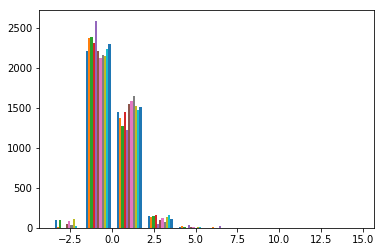

In [68]:
plt.hist(xwhite_train) # data looks normal now

In [23]:
#Performing multiplelinear regression
from sklearn.linear_model import LinearRegression
mulregressor=LinearRegression()   #mulregressor is the object for the class LinearRegression

In [34]:
mulregressor.fit(xred_train,yred_train) #Applying our regression model on training data
mulregressor.fit(xwhite_train,ywhite_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
#Predicting the test results
#xred_train,xred_test,yred_train,yred_test
y_redpred=mulregressor.predict(xred_test) 
y_whitepred=mulregressor.predict(xwhite_test)

In [36]:
y_redpred

array([[5.24887086],
       [5.58473101],
       [5.64867216],
       [6.85517589],
       [6.1468419 ],
       [5.16792308],
       [5.74610693],
       [5.50091666],
       [5.92195183],
       [5.30672463],
       [7.01475853],
       [5.51393266],
       [5.76784671],
       [6.53465097],
       [5.27517128],
       [6.60894446],
       [5.78237254],
       [6.33586318],
       [5.65148254],
       [5.13263482],
       [5.74587207],
       [5.15923515],
       [5.65128952],
       [6.2968141 ],
       [4.75682394],
       [6.68451343],
       [5.05007168],
       [5.43903847],
       [5.18303614],
       [5.28143164],
       [5.64348968],
       [6.26917041],
       [5.12126553],
       [5.50091356],
       [5.16465855],
       [5.79915328],
       [5.41809317],
       [6.72621457],
       [5.63884039],
       [5.43828076],
       [6.52723193],
       [4.51867754],
       [5.37409517],
       [7.19111531],
       [5.35583966],
       [7.26901462],
       [5.27136284],
       [5.122

In [37]:
y_whitepred

array([[5.11398008],
       [5.87618617],
       [5.39659409],
       [5.59930013],
       [5.66698413],
       [5.29638063],
       [5.68060022],
       [5.59153671],
       [5.40359573],
       [6.05295622],
       [5.78462555],
       [5.72483135],
       [6.09199887],
       [4.45935062],
       [5.65938082],
       [6.20316067],
       [6.23836968],
       [5.65776843],
       [6.36845595],
       [5.4074505 ],
       [5.59974992],
       [6.09199887],
       [4.84117079],
       [6.33497556],
       [6.32736968],
       [5.65265095],
       [6.78064589],
       [5.74597659],
       [6.40130254],
       [5.97479771],
       [5.78280119],
       [6.34254602],
       [6.19297903],
       [5.8350353 ],
       [5.73186518],
       [6.50305623],
       [5.76278743],
       [6.84226187],
       [5.97959769],
       [5.50580513],
       [6.10138495],
       [5.62222074],
       [5.19750368],
       [5.87898952],
       [6.44971111],
       [5.57719225],
       [5.68564485],
       [5.765

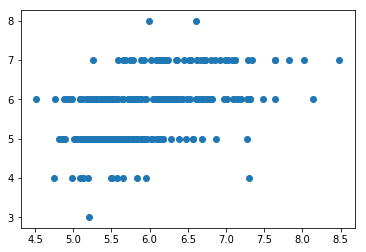

In [38]:
plt.scatter(y_redpred,yred_test) #y_redpred= predicted values of 

In [39]:
from sklearn.metrics import mean_squared_error as ms

In [40]:
ms(y_redpred,yred_test)

0.6210823315471805

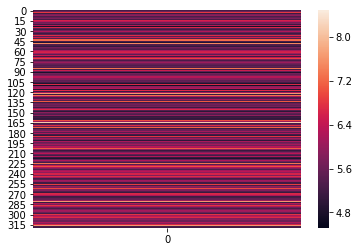

In [41]:
sbn.heatmap(y_redpred)

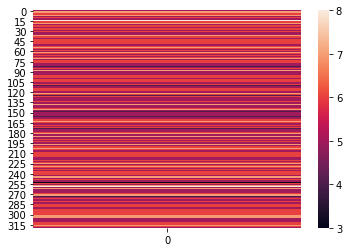

In [42]:
sbn.heatmap(yred_test)

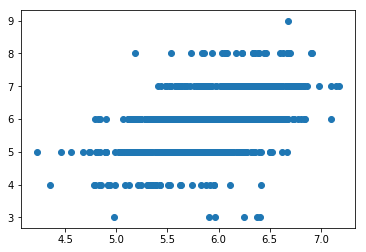

In [43]:
plt.scatter(y_whitepred,ywhite_test)

In [44]:
ms(y_whitepred,ywhite_test)

0.5883777324041027

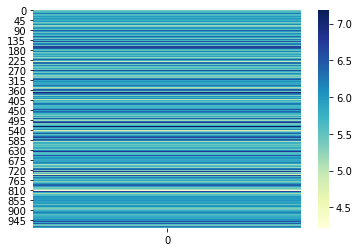

In [45]:
sbn.heatmap(y_whitepred, cmap="YlGnBu")

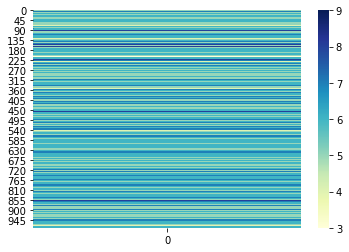

In [46]:
sbn.heatmap(ywhite_test, cmap="YlGnBu")

In [47]:
dfredtest=pd.DataFrame(yred_test)
dfredpred=pd.DataFrame(y_redpred)

dfwhitetest=pd.DataFrame(ywhite_test)
dfwhitepred=pd.DataFrame(y_whitepred)

In [48]:
dataset_redwine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [49]:
dataset_whitewine.corr() #checking correlations among white wine variables in the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [50]:
from scipy.stats import ttest_rel

In [54]:
ttest_rel(dfredtest,dfredpred)

Ttest_relResult(statistic=array([-5.55185927]), pvalue=array([5.9557468e-08]))

In [55]:
ttest_rel(dfwhitetest,dfwhitepred) #p-value is too high, should be less than 0.05

Ttest_relResult(statistic=array([-0.59075756]), pvalue=array([0.55481923]))